In [1]:
import unicodecsv
from datetime import datetime as dt
# Representing csv in python
# option1: Each row is a list(list of list)
csv = [['A1', 'A2', 'A3'],
       ['B1', 'B2', 'B3']]
# Option2: Each row is a dictionry(best option when data has a header, lost of dictionary)
csv = [{'name1': 'A1', 'name2':'A2'},
       {'name1':'B1', 'name2':'B2'}]

# reading data

enrollments = []
# f= open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# # print reader, reader is a iterator and DictReader means each rw is dictionary
# for row in reader:
#     enrollments.append(row)
# f.close()
# with statement, file will automatically be closed

# with open('enrollments.csv', 'rb') as f:
#     reader = unicodecsv.DictReader(f)
#     for row in reader:
#         enrollments.append(row)
    

# with open('daily_engagement.csv', 'rb') as f:
#     reader = unicodecsv.DictReader(f)
#     daily_engagement = list(reader)

# with open('project_submissions.csv', 'rb') as f:
#     reader = unicodecsv.DictReader(f)
#     project_submissions = list(reader)

# take date as as a string, and rwturns a python datetime object.
def parse_date(date):
    if date == "":
        return None
    else:
        return dt.strptime(date, '%y-%m-%d')

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# writitng function for reading csv file
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)


Employees = read_csv('employeelist.csv')
print Employees[0]

# Messages_Sender = read_csv('MsgWithSender_1998.csv')
# print Messages_Sender







{u'Email_id': u'robert.badeer@enron.com', u'first_name': u'Robert', u'last_name': u'Badeer', u'eid': u'1'}


In [46]:
# How long usually take studdents before they submit their project
total_days = 0
# subtation of two different dates
def days_between(d1, d2):
    
    d1 = dt.strptime(d1, "%y-%m-%d")
    d2 = dt.strptime(d2, "%y-%m-%d")
    
    return abs((d2 - d1).days)


# print days_between()

# for prj in project_submissions:
#     diff = days_between(prj['completion_date'], prj['creation_date'])
#     total_days+= diff 

# print  total_days
    



In [13]:
# print "Enrolled students", len(enrollments)

# unique_enrolled_students = set()
# for enrollment in enrollments:
#     unique_enrolled_students.add(enrollment['account_key'])
# print "unique enrolled students", len(unique_enrolled_students)

# print "Daily engagment",len(daily_engagement)

# unique_engagement_students = set()
# for engagement_record in daily_engagement:
#     unique_engagement_students.add(engagement_record['account_key'])
# print "unique engagement students",  len(unique_engagement_students)

# print "Total project submitter",len(project_submissions)

# unique_project_submitters = set()
# for submission in project_submissions:
#     unique_project_submitters.add(submission['account_key'])
# print "unique project submitters", len(unique_project_submitters)

### Updated Code for Previous Exercise After running the above code, Caroline also shows rewriting the solution from the previous exercise to the following code:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students
print "Enrolled students", len(enrollments)
unique_enrolled_students = get_unique_students(enrollments)
print "unique enrolled students", len(unique_enrolled_students)

print "Daily engagment",len(daily_engagement)
unique_engagement_students = get_unique_students(daily_engagement)
print "unique daily engagement students",  len(unique_engagement_students)

print "Total project submitter",len(project_submissions)

unique_project_submitters = get_unique_students(project_submissions)
print "unique project submitters", len(unique_project_submitters)

# Prboblem here iwth data is why more unique student in enrollment than engagement


Enrolled students 1640
unique enrolled students 1302
Daily engagment 136240
unique daily engagement students 1237
Total project submitter 3642
unique project submitters 743


In [28]:
from datetime import date

def diff_dates(date1, date2):
    return abs(date2-date1).days

# def main():
#     d1 = date(2013,1,1)
#     d2 = date(2013,9,13)
#     result1 = diff_dates(d2, d1)
#     print '{} days between {} and {}'.format(result1, d1, d2)
#     print ("Happy programmer's day!")

# main()

In [14]:
print "Students enrolled but not engaged\n To engagement, student  needs to engage for full day"
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

Students enrolled but not engaged
 To engagement, student  needs to engage for full day
{u'status': u'canceled', u'is_udacity': u'False', u'is_canceled': u'True', u'join_date': u'2014-11-12', u'account_key': u'1219', u'cancel_date': u'2014-11-12', u'days_to_cancel': u'0'}


In [56]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

print num_problem_students

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2015-01-10', u'account_key': u'1304', u'cancel_date': u'2015-03-10', u'days_to_cancel': u'59'}
{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2015-03-10', u'account_key': u'1304', u'cancel_date': u'2015-06-17', u'days_to_cancel': u'99'}
{u'status': u'current', u'is_udacity': u'True', u'is_canceled': u'False', u'join_date': u'2015-02-25', u'account_key': u'1101', u'cancel_date': u'', u'days_to_cancel': u''}
3


In [15]:
udacity_test_accounts = set()
count = 0
for enrollment in enrollments:
    if enrollment['is_udacity'] == 'True':
        udacity_test_accounts.add(enrollment['account_key'])
        
     
len(udacity_test_accounts)



6

In [16]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [ ]:
paid_students = {}

for enrollment in non_udacity_enrollments:
    if  enrollment['is_canceled'] == 'False' or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        paid_students[account_key] = enrollment_date
len(paid_students)
# print paid_students

In [29]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data



paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)
# print "paid student"
# print paid_students

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    print "join_date"
    print join_date
    engagement_record_date = engagement_record['utc_date']
    print "engagement_record_date"
    print engagement_record_date

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1622
135656
3626
join_date
2015-01-09
engagement_record_date
1/9/15


TypeError: an integer is required

In [104]:
import pandas as pd
pd.test()

Running unit tests for pandas


ImportError: Need nose >= 1.0.0 for tests - see http://somethingaboutorange.com/mrl/projects/nose

In [30]:
import pandas as pd



In [32]:

daily_engagement = pd.read_csv('daily_engagement.csv')


In [34]:
len(daily_engagement['account_key'].unique())

1237

In [23]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

print ridership_df
# # Change False to True for each block of code to see what it does

# # DataFrame creation
# if True:
#     # You can create a DataFrame out of a dictionary mapping column names to values
#     df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
#     print df_1

#     # You can also use a list of lists or a 2D NumPy array
#     df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
#     print df_2
   

# # Accessing elements
# if True:
#     print ridership_df.iloc[0]
#     print ridership_df.loc['05-05-11']
#     print ridership_df['R003']
#     print ridership_df.iloc[1, 3]
    
# # Accessing multiple rows
# if True:
#     print ridership_df.iloc[1:4]
    
# # Accessing multiple columns
# if True:
#     print ridership_df[['R003', 'R005']]
    
# # Pandas axis
# if True:
#     df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
#     print df.sum()
#     print df.sum(axis=1)
#     print df.values.sum()
    
# def mean_riders_for_max_station(ridership):
#     '''
#     Fill in this function to find the station with the maximum riders on the
#     first day, then return the mean riders per day for that station. Also
#     return the mean ridership overall for comparsion.
    
#     This is the same as a previous exercise, but this time the
#     input is a Pandas DataFrame rather than a 2D NumPy array.
#     '''
#     overall_mean = None # Replace this with your code
#     mean_for_max = None # Replace this with your code
    
#     return (overall_mean, mean_for_max)

          R003  R004  R005  R006  R007
05-01-11     0     0     2     5     0
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613
05-05-11  1608  4802  3932  4477  2705
05-06-11  1576  3933  3909  4979  2685
05-07-11    95   229   255   496   201
05-08-11     2     0     1    27     0
05-09-11  1438  3785  3589  4174  2215
05-10-11  1342  4043  4009  4665  3033


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

from plotly.graph_objs import *
import plotly.tools as tls

fig1 = plt.figure()
# Make a legend for specific lines.
import matplotlib.pyplot as plt
import numpy as np


t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(t2, np.exp(-t2))
l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', t1, np.log(1 + t1), '.')
l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

plt.xlabel('time')
plt.ylabel('volts')
plt.title('Damped oscillation')

plt.show()

ImportError: No module named plotly.graph_objs

In [13]:
print "Im p"

Im p


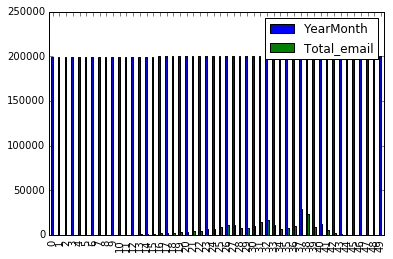

In [9]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
msg_1998 = pd.read_csv('msg_1998.csv')

# plot_1998 = msg_1998[['YearMonth','Total_email']]
msg_1998.head()

my_plot = msg_1998.plot(kind = 'bar')


# x = msg_1998[1:]
# y = msg_1998[:2]
# plt.plot(x, y)
# plt.title('A simple chirp')
# plt.show()


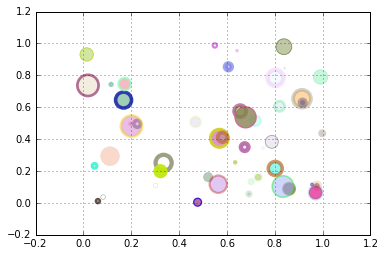

In [8]:
import matplotlib.pyplot as plt
import numpy as np


n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

plt.show()

In [ ]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)


Populating the interactive namespace from numpy and matplotlib


ERROR: Line magic function `%matplotib` not found.


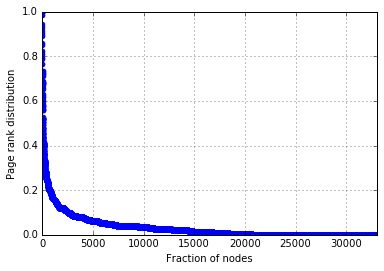

In [25]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotib inline
# matplotlib.rcParams['backend'] = "Qt4Agg"

%pylab inline
import numpy as np

Enron = pd.read_csv('chunk1.csv')
# print Enron
X= Enron['Node']
Y= Enron['Page Rank']

fig, ax = plt.subplots()
ax.scatter(X,Y, color='blue')
ax.set_xlim(1, 33022)
ax.set_ylim(0, 1)
ax.grid('on')
ax.set_xlabel('Fraction of nodes')
ax.set_ylabel('Page rank distribution')
# plt.show()
# print X

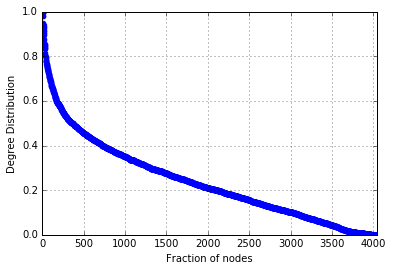

In [24]:
FB = pd.read_csv('chunk_Fb.csv')
# print Enron
X= FB['Node']
Y= FB['Degree']
# let us make a simple graph
fig, ax = plt.subplots()
ax.scatter(X,Y,color='blue')
# set the basic properties
ax.set_xlabel('Fraction of nodes')
ax.set_ylabel('Degree Distribution')
# set the limits
ax.set_xlim(1, 4044)
ax.set_ylim(0, 1)
# set the grid on
ax.grid()

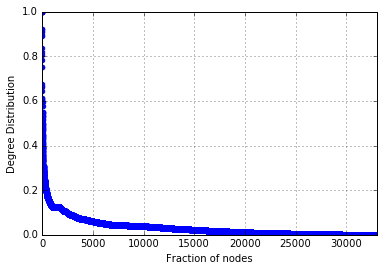

In [26]:
X= Enron['Node']
Z= Enron['Degree']
fig, ax = plt.subplots()
ax.scatter(X,Z, color='blue')
ax.set_xlim(1, 33022)
ax.set_ylim(0, 1)
ax.grid()
ax.set_xlabel('Fraction of nodes')
ax.set_ylabel('Degree Distribution')


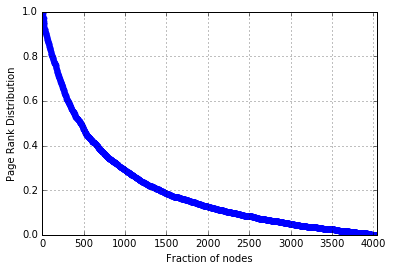

In [27]:
X= FB['Node']
Y= FB['Page rank']
# let us make a simple graph
fig, ax = plt.subplots()
ax.scatter(X,Y, color='blue')
# set the basic properties
ax.set_xlabel('Fraction of nodes')
ax.set_ylabel('Page Rank Distribution')
# set the limits
ax.set_xlim(1, 4044)
ax.set_ylim(0, 1)
# set the grid on
ax.grid()

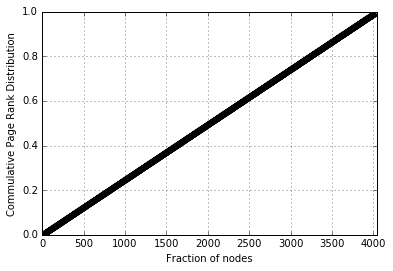

In [11]:
import brewer2mpl
import powerlaw
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors
X= FB['Node']
Y= FB['PR_Cum']
# let us make a simple graph
fig, ax = plt.subplots()
# ax.plot(x, y, color=blue, lw=3)
color = set2[2]
ax.scatter(X,Y,label=str(2), facecolor=color)
# set the basic properties
ax.set_xlabel('Fraction of nodes')
ax.set_ylabel('Commulative Degree Distribution')
# set the limits
ax.set_xlim(1, 4044)
ax.set_ylim(0, 1)
# set the grid on
ax.grid()

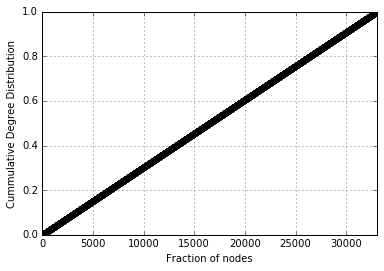

In [18]:
X= Enron['Node']
Y= Enron['Cum_Degree']
fig, ax = plt.subplots()
ax.scatter(X,Y)
ax.set_xlim(1, 33021)
ax.set_ylim(0, 1)
ax.grid()
ax.set_xlabel('Fraction of nodes')
ax.set_ylabel('Cummulative Degree Distribution')


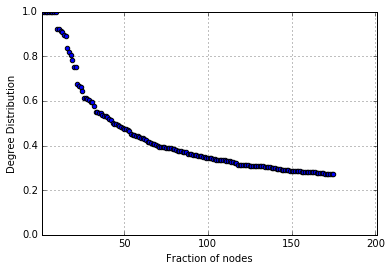

In [22]:
Wrk = pd.read_csv('W.csv')
# print Enron
X= Wrk['Node']
Y= Wrk['Degree']
# let us make a simple graph
fig, ax = plt.subplots()
ax.scatter(X,Y)
# set the basic properties
ax.set_xlabel('Fraction of nodes')
ax.set_ylabel('Degree Distribution')
# set the limits
ax.set_xlim(1, 201)
ax.set_ylim(0, 1)
# set the grid on
ax.grid()

In [54]:
import powerlaw
PL_Enron = pd.read_csv('PL_Enron.csv')
data = PL_Enron['Enron_Degree']
# print data
fit=powerlaw.Fit(data)
# Calculating best minimal value for power law fit
fit.power_law.alpha
# Calculating best minimal value for power law fit
# powerlaw.plot_cdf(data)



Calculating best minimal value for power law fit


2.1056194346233479

In [46]:
# Calculating best minimal value for power law fit
fit.power_law.sigma

0.0086035863925544836

In [56]:
fit.xmin

154.0

In [60]:
PL_Facebook = pd.read_csv('PL_Facebook.csv')
data = PL_Facebook['Degree']
# print data
fit=powerlaw.Fit(data)
# Calculating best minimal value for power law fit
fit.power_law.alpha
# Calculating best minimal value for power law fit
# powerlaw.plot_pdf(data)

Calculating best minimal value for power law fit


5.9932948548234357

In [61]:
# Calculating best minimal value for power law fit
fit.power_law.sigma

0.35132699999681688

In [62]:
fit.xmin

154.0